<a href="https://colab.research.google.com/github/Marimango06/Laboratorio-ECG/blob/main/lab4_ecg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scipy
!pip install matplotlib
!pip install numpy
!pip install google.drive
!pip install wfdb
!pip install pandas
!pip install PyWavelets --upgrade

  Using cached pywavelets-1.7.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.0 kB)
Using cached pywavelets-1.7.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.5 MB)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.signal as signal
from scipy import stats
import google.colab as drive
import pandas as pd
import scipy.fftpack as fourier
from google.colab import drive
import csv
import pywt

[1.00003333e-02 2.00006667e-02 3.00010000e-02 ... 2.99979999e+02
 2.99990000e+02 3.00000000e+02]
[  1.13720759  -0.42389553   1.85133543 ... -34.81828579  -9.09521393
  -0.39750646]


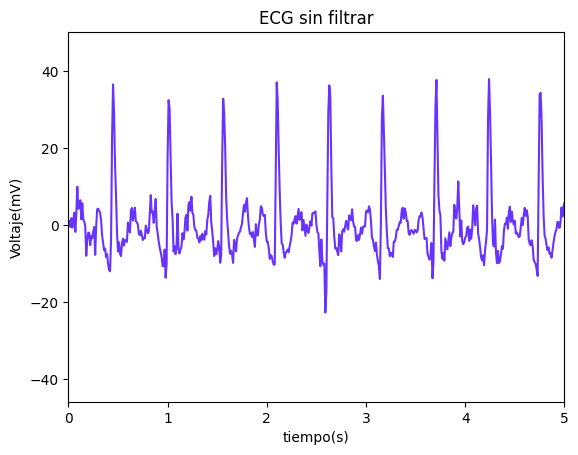

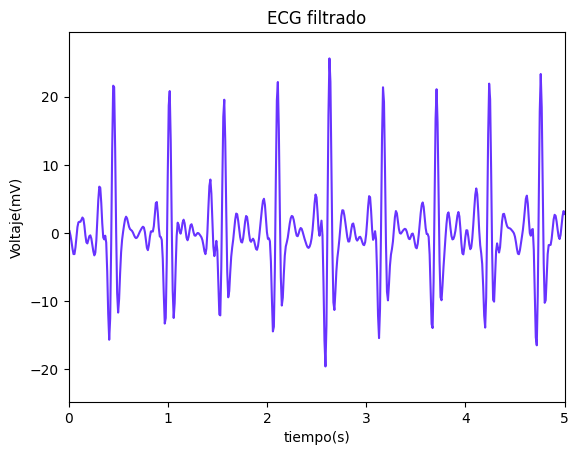

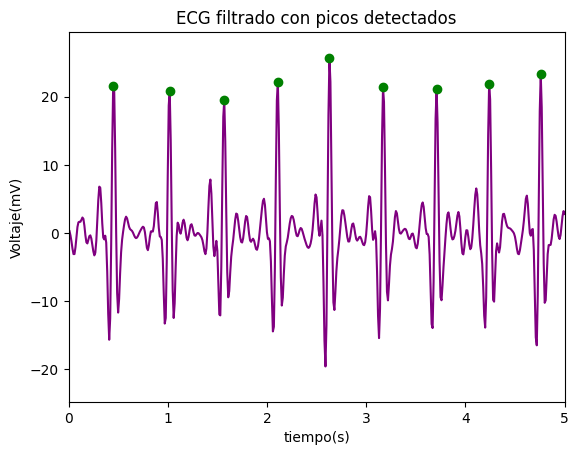

505
la media de la distancia de intervalos es de: -0.00011928827051018055
la desviacion de la distancia de intervalos es de: 0.13692172090358096


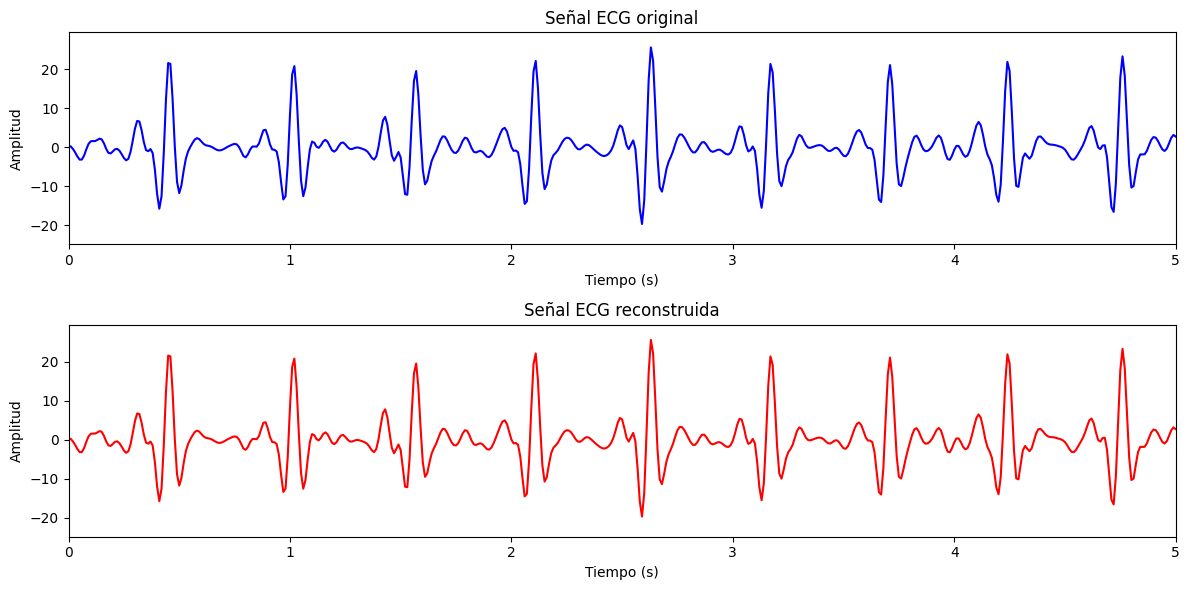

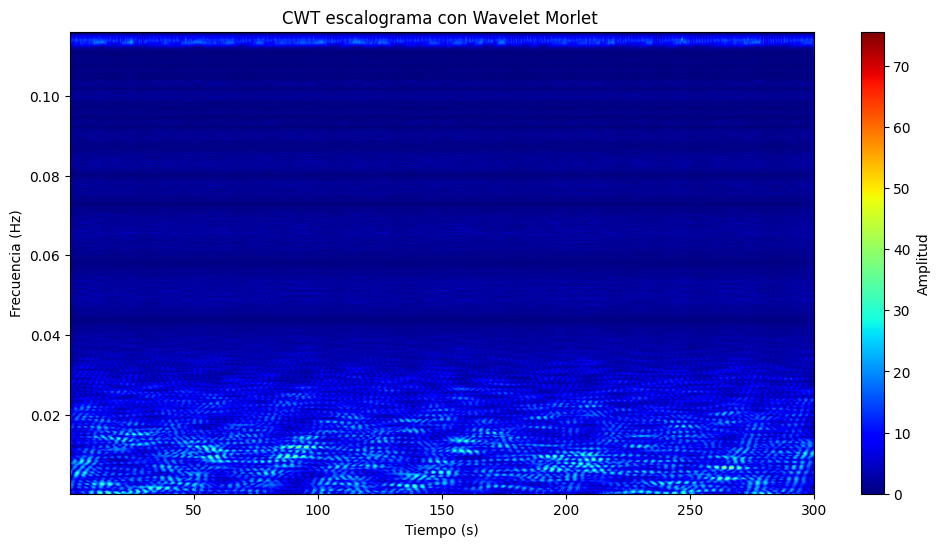

In [18]:
##importacion de la señal
x, y=np.loadtxt('maria.txt',skiprows=1, unpack=True,delimiter=',',encoding='latin-1')
x=30*x
print(x)
print(y)
plt.plot(x,y, color='#6833ff')
plt.xlabel('tiempo(s)')
plt.ylabel('Voltaje(mV)')
plt.title('ECG sin filtrar')
plt.xlim(0,5)
plt.show()

#aplicacion del filtro pasa banda

# diseño del filtro
def diseño_filtro_pasabanda(fs,fc,Q,order=4):
  w0=fc/(fs/2)
  bw= fc / Q
  fs0=fc-bw/2
  fsc=fc+bw/2
  wn=[fs0/(fs/2),fsc/(fs/2)]
  b, a= signal.butter(order,wn,btype='bandpass')
  return b,a

## aplicar filtro
def aplicar_filtro(x,fs,fc,Q,order=4):
  b,a=diseño_filtro_pasabanda(fs,fc,Q,order)
  y=signal.filtfilt(b,a,x)
  return y
#aplicacion del filtro
fs=7
fc=0.8
Q=1
y=aplicar_filtro(y,fs,fc,Q)
plt.plot(x,y, color='#6833ff')
plt.xlabel('tiempo(s)')
plt.ylabel('Voltaje(mV)')
plt.title('ECG filtrado')
plt.xlim(0,5)
plt.show()

# Calculo de intervalo R-R
picos, _ = signal.find_peaks(y, distance=50) # Ajusta 'distance' según tu señal
picos_x=x[picos]
intervalos_rr = np.diff(picos_x)

# Imprime los intervalos R-R
#print("Intervalos R-R:", intervalos_rr)

# Gráfica los picos detectados
plt.plot(x, y, color='purple')
plt.plot(x[picos], y[picos], "o", color='green')  # Marca los picos
plt.xlabel('tiempo(s)')
plt.ylabel('Voltaje(mV)')
plt.title('ECG filtrado con picos detectados')
plt.xlim(0, 5)  # Ajusta los límites según tu señal
plt.show()


#Calcular la distancia entre intervalos R-R
distancia_intervalos = np.diff(intervalos_rr)
print(len(picos))
# Calcular la media y la desviación estándar de los intervalos R-R
media_rr = np.mean(distancia_intervalos)
print("la media de la distancia de intervalos es de:",media_rr)
desviacion_estandar_rr = np.std(distancia_intervalos)
print("la desviacion de la distancia de intervalos es de:",desviacion_estandar_rr)

# Aplicar la transformada wavelet
wavelet = 'db4'  # Elige la wavelet que desees (e.g., 'db4', 'sym4', 'coif5')
level = 4       # Elige el nivel de descomposición

coeffs = pywt.wavedec(y, wavelet, level=level)

# Reconstruir la señal a partir de los coeficientes wavelet
reconstructed_signal = pywt.waverec(coeffs, wavelet)
reconstructed_signal = reconstructed_signal[:len(x)]
# Graficar la señal original y la reconstruida
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(x, y, color='blue', label='Señal original')
plt.title('Señal ECG original')
plt.xlabel('Tiempo (s)')
plt.xlim(0, 5)
plt.ylabel('Amplitud')

plt.subplot(2, 1, 2)
plt.plot(x, reconstructed_signal, color='red', label='Señal reconstruida')
plt.title('Señal ECG reconstruida')
plt.xlabel('Tiempo (s)')
plt.xlim(0, 5)
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

# Aplicar wavelet Morlet
wavelet = 'morl'
scales = np.arange(1, 512)
frequencies=pywt.scale2frequency(wavelet,scales)/fs
coeffs,freqs = pywt.cwt(y, scales, wavelet,sampling_period=1/fs)
plt.figure(figsize=(12, 6))
plt.imshow(np.abs(coeffs.real), extent=[x[0], x[-1], frequencies[0], frequencies[-1]], cmap='jet', aspect='auto', origin='lower')
plt.title('CWT escalograma con Wavelet Morlet ')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.colorbar(label='Amplitud')
plt.gca().invert_yaxis()
plt.show()